# Problem Description
**URL:**  
https://www.drivendata.org/competitions/66/flu-shot-learning/
**Challenge description:**  
This challenge uses survey data to predict whether individuals receive H1N1 or seasonal flu vaccines. The features include respondents’ social, economic, and demographic backgrounds; their opinions on risk of illness and vaccine effectiveness; and their behaviors toward mitigating transmission. There are both numerical and categorical variables (e.g., race, education, occupation).

**Datapoint definition:**  
Each datapoint is one survey respondent’s full record of demographics, opinions, and behaviors.

**Outcome variable:**  
Binary indicators for whether the respondent was vaccinated or unvaccinated against H1N1 and against seasonal flu.

# Dataset Description
- **Number of examples:** ~26,700  
- **Number of features:** 35  
- I do believe that we may need a feature reduction technique in a supervised ML approach, since there are considerably more examples compared to the features with both together making a incredibly huge dataset. However, overall, the data set has a moderate dataset compared to the size of the data points so, we may be amply sampling the region. 

**How the dataset is provided:**  
The data is provided on thier site and is divided into the following categories: 
- Submission Format
- Training set features.
- Labels for the training set.
- Test set features.

**Stated file size:**  
- The website only provides the link not how big the file is. 

# Data Gathering and processing;

**Downloading the data diretly from the website** 

The data was downloaded directly from the challenge site site:  

In [267]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import gffutils
import pyfaidx

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn import svm
from sklearn.metrics import *

In [268]:
# Loading the Dataset as a Dataframe
import pandas as pd
df = pd.read_csv('training_set_features.csv')
df_t = pd.read_csv('test_set_features.csv') 
labels = pd.read_csv('training_set_labels.csv')



# merging the df and labels into one combined data set by matching to the common column and keeping those that match for both data frames
data = df.merge(labels, on='respondent_id', how='inner')
data_t = df_t.merge(labels, on='respondent_id', how='inner')
print(df.shape)
df.head()

(26707, 36)


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [269]:
df_t.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


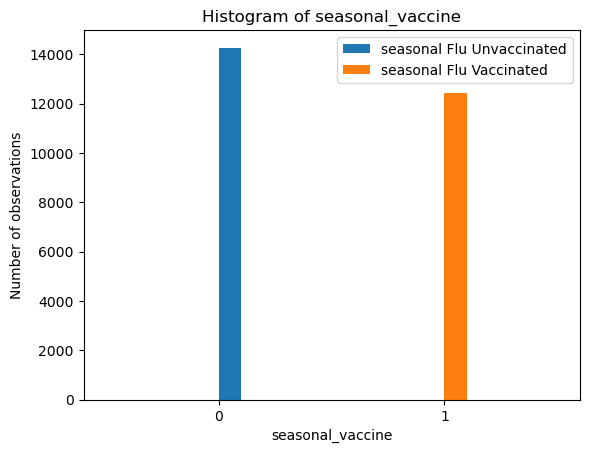

In [270]:
# Plotting a Histogram to show the class distribution of the patients sealsonal vaccine status

feature_name = "seasonal_vaccine" # Column Name for the outcome var
# subesting based on outcome: 
class_1_feat = data[data["seasonal_vaccine"] == 0][feature_name] 
class_2_feat = data[data["seasonal_vaccine"] == 1][feature_name]

class_1_name = "seasonal Flu Unvaccinated"
class_2_name = "seasonal Flu Vaccinated"

plt.hist(class_1_feat, label=class_1_name)
plt.hist(class_2_feat, label=class_2_name)

plt.legend(loc='upper right')
plt.title(f"Histogram of {feature_name}")
plt.xlabel(f"{feature_name}")
plt.ylabel("Number of observations")
plt.xticks([0,1])
plt.show()

## Preping the data to take care of missing value: 

In [271]:
# looking the number of NA values in the data set: 
df.isnull().sum()


respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

**We can see that the there is not a vast class difference for seasonal flu vaccinated individuals. We will now further analyse the data to look for categorical features and making them numerical.**

In [272]:
# Splitting the Dataframe for categorical features:
categorical = df.select_dtypes(include=['object','category']).columns.tolist()
df[categorical]

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,NaN,NaN
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",pxcmvdjn,xgwztkwe
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",rucpziij,xtkaffoo
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",NaN,NaN
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...
26702,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,NaN,NaN
26703,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",fcxhlnwr,cmhcxjea
26704,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",NaN,NaN
26705,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,fcxhlnwr,haliazsg


In [273]:
# We can see that there are 12 features which are categorical, lets see the categories for each: 
for col in categorical:
    cats = df[col].dropna().unique()
    print(f"{col}:, {cats} ") 

age_group:, ['55 - 64 Years' '35 - 44 Years' '18 - 34 Years' '65+ Years'
 '45 - 54 Years'] 
education:, ['< 12 Years' '12 Years' 'College Graduate' 'Some College'] 
race:, ['White' 'Black' 'Other or Multiple' 'Hispanic'] 
sex:, ['Female' 'Male'] 
income_poverty:, ['Below Poverty' '<= $75,000, Above Poverty' '> $75,000'] 
marital_status:, ['Not Married' 'Married'] 
rent_or_own:, ['Own' 'Rent'] 
employment_status:, ['Not in Labor Force' 'Employed' 'Unemployed'] 
hhs_geo_region:, ['oxchjgsf' 'bhuqouqj' 'qufhixun' 'lrircsnp' 'atmpeygn' 'lzgpxyit'
 'fpwskwrf' 'mlyzmhmf' 'dqpwygqj' 'kbazzjca'] 
census_msa:, ['Non-MSA' 'MSA, Not Principle  City' 'MSA, Principle City'] 
employment_industry:, ['pxcmvdjn' 'rucpziij' 'wxleyezf' 'saaquncn' 'xicduogh' 'ldnlellj'
 'wlfvacwt' 'nduyfdeo' 'fcxhlnwr' 'vjjrobsf' 'arjwrbjb' 'atmlpfrs'
 'msuufmds' 'xqicxuve' 'phxvnwax' 'dotnnunm' 'mfikgejo' 'cfqqtusy'
 'mcubkhph' 'haxffmxo' 'qnlwzans'] 
employment_occupation:, ['xgwztkwe' 'xtkaffoo' 'emcorrxb' 'vlluhbov' '

In [274]:
# making a dictionary for the categorical feturues:
cat_df ={}
for col in categorical:
    cats = df[col].dropna().unique().tolist()
    cat_df[col]=cats
cat_df

{'age_group': ['55 - 64 Years',
  '35 - 44 Years',
  '18 - 34 Years',
  '65+ Years',
  '45 - 54 Years'],
 'education': ['< 12 Years', '12 Years', 'College Graduate', 'Some College'],
 'race': ['White', 'Black', 'Other or Multiple', 'Hispanic'],
 'sex': ['Female', 'Male'],
 'income_poverty': ['Below Poverty', '<= $75,000, Above Poverty', '> $75,000'],
 'marital_status': ['Not Married', 'Married'],
 'rent_or_own': ['Own', 'Rent'],
 'employment_status': ['Not in Labor Force', 'Employed', 'Unemployed'],
 'hhs_geo_region': ['oxchjgsf',
  'bhuqouqj',
  'qufhixun',
  'lrircsnp',
  'atmpeygn',
  'lzgpxyit',
  'fpwskwrf',
  'mlyzmhmf',
  'dqpwygqj',
  'kbazzjca'],
 'census_msa': ['Non-MSA', 'MSA, Not Principle  City', 'MSA, Principle City'],
 'employment_industry': ['pxcmvdjn',
  'rucpziij',
  'wxleyezf',
  'saaquncn',
  'xicduogh',
  'ldnlellj',
  'wlfvacwt',
  'nduyfdeo',
  'fcxhlnwr',
  'vjjrobsf',
  'arjwrbjb',
  'atmlpfrs',
  'msuufmds',
  'xqicxuve',
  'phxvnwax',
  'dotnnunm',
  'mfikgej

In [275]:
## Dealing With Missing Values Using SimpleImputer to account for string values


# Imputer being intialized
imputer = SimpleImputer(missing_values=pd.NA, strategy='most_frequent', add_indicator=True)
df2=df.copy()
# Imputer being fit to the data and transforming the data back to a data frame
df2 = pd.DataFrame(imputer.fit_transform(df2), columns=imputer.get_feature_names_out(df2.columns))


# now we will covert these categories to numbers by assigning them number in asscending order for thier respective order in the df above, using it a mapping index, this all is done using the OrdinalEncoder from sklearn
encoders = {}
for col in cat_df: 
    encoder = OrdinalEncoder(categories=[cat_df[col]])
    df2[col] = encoder.fit_transform(df2[[col]].astype(str))
    encoders[col] = encoder
df2

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,missingindicator_opinion_seas_sick_from_vacc,missingindicator_education,missingindicator_income_poverty,missingindicator_marital_status,missingindicator_rent_or_own,missingindicator_employment_status,missingindicator_household_adults,missingindicator_household_children,missingindicator_employment_industry,missingindicator_employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,False,False,False,False,False,False,False,False,True,True
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,True
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,False,False,False,False,False,False,False,False,True,True
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,False,False,True,False,False,True,False,False,True,True
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,False,False,False,False,False,False,False,False,False,False


# Splitting the data 

### Since the data provided to us has already been split in a test set and training set, I decide to train on the training set by considering it the crossvalidation set

In [276]:
# manually creating the class and dataframe sepration for the crossvalidation set 
df_crossval = df2.copy()
class_crossval = labels["seasonal_vaccine"].copy()

# Copying the now crossvalidation dataframe and replacing the index
df_crossval.reset_index(inplace = True)
class_crossval = class_crossval.reset_index()




# Begining SVM Model Building

In [277]:
# Preparing data for crossvalidation: 
n_partitions = 5
skf = StratifiedKFold(n_splits = n_partitions)


# Split into crossvalidation sets (sets of indices in df_crossval and class_crossval)
#  and print out the resulting partition compositions for each partition as
y = class_crossval["seasonal_vaccine"]  # This line is needed for the np.bincount function to work
for train, test in skf.split(df_crossval, y):
    print(f"train : {np.bincount(y[train])} | test : {np.bincount(y[test])}")

train : [11417  9948] | test : [2855 2487]
train : [11417  9948] | test : [2855 2487]
train : [11418  9948] | test : [2854 2487]
train : [11418  9948] | test : [2854 2487]
train : [11418  9948] | test : [2854 2487]


In [278]:
# Applying Logistic Regression to the data
model_lr = LogisticRegression(penalty="l1", solver="liblinear", random_state=42, max_iter=1000)

scores = cross_validate(model_lr, df_crossval, class_crossval["seasonal_vaccine"], cv=skf,
    scoring=('accuracy', 'precision'),
    return_train_score=True)

In [279]:
# Applying SVM Classifier 
#clf = svm.SVC(kernel='linear', C=1, random_state=42)  # define classifier
#scores = cross_validate(clf, df_crossval, class_crossval["seasonal_vaccine"], cv=skf,
    #scoring=('accuracy', 'precision'),
   # return_train_score=True)

In [280]:
# Examine results
scores

# Nicer printing of specific performance metrics across partitions
scores_train_acc = scores["train_accuracy"]
print('%, '.join([str(round(100*x, 2)) for x in scores_train_acc]) + '%')

scores_train_acc = scores["test_accuracy"]
print('%, '.join([str(round(100*x, 2)) for x in scores_train_acc]) + '%')

76.8%, 76.87%, 76.89%, 76.78%, 76.91%
76.19%, 76.83%, 76.56%, 76.78%, 76.61%


In [281]:
# Prepare for final model training and evaluation
df_crossval = df_crossval.set_index("index") # remove explicit index column and reset indices to the original dataset indices
class_crossval = class_crossval.set_index("index") # remove explicit index column and reset indices to the original dataset indices

In [282]:
#clf_final = svm.SVC(kernel='linear', C=1, random_state=42)  # define classifier

#final_model = clf_final.fit(df_crossval, class_crossval['seasonal_vaccine']) # train model


In [283]:
clf_final = LogisticRegression(penalty="l1", solver="liblinear", random_state=42, max_iter=1000)
  # define classifier

final_model = clf_final.fit(df_crossval, class_crossval['seasonal_vaccine']) # train model


In [284]:
# Before we do predictions on the Test Set, we need to do the same preprocessing steps as above, 
# Now removing any rows with NA values: 
df_t2=df_t.copy()
# Imputer being fit to the data and transforming the data back to a data frame
df_t2 = pd.DataFrame(imputer.transform(df_t2), columns=imputer.get_feature_names_out(df_t2.columns))
# Make sure to retain the original indexs just in case we need to refer back to the original data
df_t2.index = df_t.index

# Now mapping the categorical features to numbers 
for col in cat_df: 
    encoder = OrdinalEncoder(categories=[cat_df[col]])
    df_t2[col] = encoder.fit_transform(df_t2[[col]])
df_t2.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,missingindicator_opinion_seas_sick_from_vacc,missingindicator_education,missingindicator_income_poverty,missingindicator_marital_status,missingindicator_rent_or_own,missingindicator_employment_status,missingindicator_household_adults,missingindicator_household_children,missingindicator_employment_industry,missingindicator_employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,False,False,False,False,False,False,False,False,False,False
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,True
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False


In [285]:
pred_train_proba = final_model.predict_proba(df_crossval)[:, 1] # predict class labels for the training set
pred_test_proba = final_model.predict_proba(df_t2)[:, 1]  # probability of class 1 # predict class labels for the independent test set


In [286]:
# Evaluate final model performance

accuracy_score(pred_train, class_crossval) # accuracy in training
#accuracy_score(pred_test, class_test) # accuracy in testing


0.7689744261804021

In [287]:
confusion_matrix(pred_train, class_crossval) # confusion matrix in training
#confusion_matrix(pred_test, class_test) # confusion matrix in testing

array([[11515,  3413],
       [ 2757,  9022]])

# Repeat the modeling for H1N1 


In [288]:
# manually creating the class and dataframe sepration for the crossvalidation set 
df_crossval2 = df2.copy()
class_crossval2 = labels["h1n1_vaccine"].copy()

# Copying the now crossvalidation dataframe and replacing the index
df_crossval2.reset_index(inplace = True)
class_crossval2 = class_crossval2.reset_index()

In [289]:
# Preparing data for crossvalidation: 
n_partitions = 5
skf = StratifiedKFold(n_splits = n_partitions)


# Split into crossvalidation sets (sets of indices in df_crossval and class_crossval)
#  and print out the resulting partition compositions for each partition as
y = class_crossval2["h1n1_vaccine"]  # This line is needed for the np.bincount function to work
for train, test in skf.split(df_crossval2, y):
    print(f"train : {np.bincount(y[train])} | test : {np.bincount(y[test])}")

train : [16826  4539] | test : [4207 1135]
train : [16826  4539] | test : [4207 1135]
train : [16826  4540] | test : [4207 1134]
train : [16827  4539] | test : [4206 1135]
train : [16827  4539] | test : [4206 1135]


In [290]:
# Applying Logistic Regression to the data
model_lr2 = LogisticRegression(penalty="l1", solver="liblinear", random_state=42, max_iter=1000)

scores2 = cross_validate(model_lr2, df_crossval2, class_crossval2["h1n1_vaccine"], cv=skf,
    scoring=('accuracy', 'precision'),
    return_train_score=True)

In [291]:
# Examine results
scores2

# Nicer printing of specific performance metrics across partitions
scores_train_acc = scores2["train_accuracy"]
print('%, '.join([str(round(100*x, 2)) for x in scores_train_acc]) + '%')

scores_train_acc = scores2["test_accuracy"]
print('%, '.join([str(round(100*x, 2)) for x in scores_train_acc]) + '%')

85.08%, 85.2%, 85.17%, 84.85%, 85.06%
85.01%, 84.52%, 84.76%, 85.98%, 84.53%


In [292]:
# Prepare for final model training and evaluation
df_crossval2 = df_crossval2.set_index("index") # remove explicit index column and reset indices to the original dataset indices
class_crossval2 = class_crossval2.set_index("index") # remove explicit index column and reset indices to the original dataset indices

In [293]:
clf_final = LogisticRegression(penalty="l1", solver="liblinear", random_state=42, max_iter=1000)
  # define classifier

final_model2 = clf_final.fit(df_crossval2, class_crossval2['h1n1_vaccine']) # train model


In [ ]:
pred_train_proba2 = final_model2.predict_proba(df_crossval2)[:, 1] # predict class labels for the training set
pred_test_proba2 = final_model2.predict_proba(df_t2)[:, 1] # predict class labels for the independent test set


In [295]:
# Evaluate final model performance

accuracy_score(pred_train2, class_crossval2) # accuracy in training
#accuracy_score(pred_test, class_test) # accuracy in testing


0.850788182873404

In [296]:
confusion_matrix(pred_train2, class_crossval2) # confusion matrix in training
#confusion_matrix(pred_test, class_test) # confusion matrix in testing

array([[19989,  2941],
       [ 1044,  2733]])

### Since We don't get Class_test (Ground Truth for the test set), we will just output the predicted_test values in a csv. 


In [298]:
pred_test_df = pd.DataFrame()
test_id= df_t2['respondent_id']
pred_test_df['respondent_id'] = test_id
pred_test_df['h1n1_vaccine']= pred_test_proba2.astype(float)
pred_test_df['seasonal_vaccine'] = pred_test_proba.astype(float)
pred_test_df
pred_test_df.to_csv('predictions_LR_Ord_Impu.csv', index=False)
